In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import torchvision.models as models
from collections import OrderedDict

import time
import pickle
import pandas
import numpy as np 
import matplotlib.pyplot as plt   
import scipy.stats as st

import W2reg_core as W2Rcore
import W2reg_misc as W2Rmisc

import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Load pre-treated MNIST data.** 

The treatments make the predictions $y$ biased with respect to the variable $S$ (see the JMIV 2022 paper). 

In [13]:
#Data loading
X_bw=pickle.load(open("X_bw_np_32186", 'rb'))
X_bw_nogen=pickle.load(open("X_bw_nogen_np_32186","rb"))
Titles_=pickle.load(open("Titles_np_32186","rb"))
Gen_=pickle.load(open("Gen_np_32186","rb"))

In [14]:
n=32186

Gen_=Gen_[:n]
Titles_=Titles_[:n]
X_bw=X_bw[:n]
X_bw_nogen=X_bw_nogen[:n]

Titles=[]
Gen=[]
for i in range(len(Titles_)):
    if Titles_[i]=="nurse" :
        Titles.append([1])
    else :
        Titles.append([0])
    if Gen_[i]=="F":
        Gen.append(1)
    else :
        Gen.append(0)

In [15]:
Gen =torch.FloatTensor(Gen)
Titles = torch.FloatTensor(Titles) 
X_bw=torch.FloatTensor(X_bw.values.tolist())
X_bw_nogen=torch.FloatTensor(X_bw_nogen.values.tolist())


X_bw_train, X_bw_test, X_bw_nogen_train, X_bw_nogen_test, Titles_train, Titles_test, Gen_train, Gen_test = train_test_split(X_bw, X_bw_nogen, Titles, Gen, test_size = 0.4, random_state=0)


## With gender information

In [16]:
#parametres
input_size = len(X_bw_train[0])
opti_lr = 1e-3 #le pas d'apprentissage

In [17]:
class Logistic_Reg_model(torch.nn.Module):
    def __init__(self,input_dim):
        super(Logistic_Reg_model,self).__init__()
        self.layer1=torch.nn.Linear(input_dim,1)
    def forward(self,x):
        y_predicted=torch.sigmoid(self.layer1(x))
        return y_predicted

**Training phase with or without the W2 regulatization.**

Run training - without reg
epoch 0 -- batchNb 1: 0.26498008 0.0 --  lambda=0.0
epoch 0 -- batchNb 2: 0.25304875 0.0 --  lambda=0.0
epoch 0 -- batchNb 3: 0.2480592 0.0 --  lambda=0.0
epoch 0 -- batchNb 4: 0.24374892 0.0 --  lambda=0.0
epoch 0 -- batchNb 5: 0.2391265 0.0 --  lambda=0.0
epoch 0 -- batchNb 6: 0.23259349 0.0 --  lambda=0.0
epoch 0 -- batchNb 7: 0.22614494 0.0 --  lambda=0.0
epoch 0 -- batchNb 8: 0.2195277 0.0 --  lambda=0.0
epoch 0 -- batchNb 9: 0.21766034 0.0 --  lambda=0.0
epoch 0 -- batchNb 10: 0.21626084 0.0 --  lambda=0.0
epoch 0 -- batchNb 11: 0.20944145 0.0 --  lambda=0.0
epoch 0 -- batchNb 12: 0.2058121 0.0 --  lambda=0.0
epoch 0 -- batchNb 13: 0.20265613 0.0 --  lambda=0.0
epoch 0 -- batchNb 14: 0.19536667 0.0 --  lambda=0.0
epoch 0 -- batchNb 15: 0.1991847 0.0 --  lambda=0.0
epoch 0 -- batchNb 16: 0.1956369 0.0 --  lambda=0.0
epoch 0 -- batchNb 17: 0.18663742 0.0 --  lambda=0.0
epoch 0 -- batchNb 18: 0.19052957 0.0 --  lambda=0.0
epoch 0 -- batchNb 19: 0.17648214 

epoch 2 -- batchNb 78: 0.058441706 0.0 --  lambda=0.0
epoch 2 -- batchNb 79: 0.06656447 0.0 --  lambda=0.0
epoch 2 -- batchNb 80: 0.072894 0.0 --  lambda=0.0
epoch 2 -- batchNb 81: 0.05757608 0.0 --  lambda=0.0
epoch 2 -- batchNb 82: 0.0555583 0.0 --  lambda=0.0
epoch 2 -- batchNb 83: 0.057607666 0.0 --  lambda=0.0
epoch 2 -- batchNb 84: 0.061760444 0.0 --  lambda=0.0
epoch 2 -- batchNb 85: 0.06832824 0.0 --  lambda=0.0
epoch 2 -- batchNb 86: 0.069704965 0.0 --  lambda=0.0
epoch 2 -- batchNb 87: 0.06306178 0.0 --  lambda=0.0
epoch 2 -- batchNb 88: 0.043761663 0.0 --  lambda=0.0
epoch 2 -- batchNb 89: 0.059120636 0.0 --  lambda=0.0
epoch 2 -- batchNb 90: 0.06832567 0.0 --  lambda=0.0
epoch 2 -- batchNb 91: 0.057183217 0.0 --  lambda=0.0
epoch 2 -- batchNb 92: 0.07077124 0.0 --  lambda=0.0
epoch 2 -- batchNb 93: 0.062714644 0.0 --  lambda=0.0
epoch 2 -- batchNb 94: 0.06124987 0.0 --  lambda=0.0
epoch 2 -- batchNb 95: 0.06009061 0.0 --  lambda=0.0
epoch 2 -- batchNb 96: 0.06252845 0.0 -- 

epoch 5 -- batchNb 57: 0.058823265 0.0 --  lambda=0.0
epoch 5 -- batchNb 58: 0.055229153 0.0 --  lambda=0.0
epoch 5 -- batchNb 59: 0.04605392 0.0 --  lambda=0.0
epoch 5 -- batchNb 60: 0.044685446 0.0 --  lambda=0.0
epoch 5 -- batchNb 61: 0.040759616 0.0 --  lambda=0.0
epoch 5 -- batchNb 62: 0.049407657 0.0 --  lambda=0.0
epoch 5 -- batchNb 63: 0.047696352 0.0 --  lambda=0.0
epoch 5 -- batchNb 64: 0.043031592 0.0 --  lambda=0.0
epoch 5 -- batchNb 65: 0.057162184 0.0 --  lambda=0.0
epoch 5 -- batchNb 66: 0.054769516 0.0 --  lambda=0.0
epoch 5 -- batchNb 67: 0.057270028 0.0 --  lambda=0.0
epoch 5 -- batchNb 68: 0.044959426 0.0 --  lambda=0.0
epoch 5 -- batchNb 69: 0.04689828 0.0 --  lambda=0.0
epoch 5 -- batchNb 70: 0.050103415 0.0 --  lambda=0.0
epoch 5 -- batchNb 71: 0.051345963 0.0 --  lambda=0.0
epoch 5 -- batchNb 72: 0.048457015 0.0 --  lambda=0.0
epoch 5 -- batchNb 73: 0.042577997 0.0 --  lambda=0.0
epoch 5 -- batchNb 74: 0.04595294 0.0 --  lambda=0.0
epoch 5 -- batchNb 75: 0.063597

Run training - with reg
epoch 0 -- batchNb 1: 0.25503725 0.0001100850879384877 --  lambda=0.0005
epoch 0 -- batchNb 2: 0.24999537 0.00011354776349369055 --  lambda=0.0005
epoch 0 -- batchNb 3: 0.24693538 0.00011810970254538479 --  lambda=0.0005
epoch 0 -- batchNb 4: 0.23885916 0.00023194382686106345 --  lambda=0.0005
epoch 0 -- batchNb 5: 0.23855545 0.00048614281026710787 --  lambda=0.0005
epoch 0 -- batchNb 6: 0.23127633 0.0009717158880558928 --  lambda=0.0005
epoch 0 -- batchNb 7: 0.22496346 0.0027773791134173657 --  lambda=0.0005
epoch 0 -- batchNb 8: 0.22341436 0.002337586140732486 --  lambda=0.0005
epoch 0 -- batchNb 9: 0.22002766 0.003253032298005537 --  lambda=0.0005
epoch 0 -- batchNb 10: 0.21336739 0.006546811443827985 --  lambda=0.0005
epoch 0 -- batchNb 11: 0.2095531 0.003959192934926881 --  lambda=0.0005
epoch 0 -- batchNb 12: 0.20330667 0.0040542467040757795 --  lambda=0.0005
epoch 0 -- batchNb 13: 0.2008038 0.006406645901945302 --  lambda=0.0005
epoch 0 -- batchNb 14: 0.1

epoch 1 -- batchNb 21: 0.107386835 0.08170961675040544 --  lambda=0.0005
epoch 1 -- batchNb 22: 0.09977117 0.08764512180177257 --  lambda=0.0005
epoch 1 -- batchNb 23: 0.099154495 0.07617963733292238 --  lambda=0.0005
epoch 1 -- batchNb 24: 0.08976137 0.11068997230297542 --  lambda=0.0005
epoch 1 -- batchNb 25: 0.10716149 0.11010910553496409 --  lambda=0.0005
epoch 1 -- batchNb 26: 0.10910265 0.11523223093848395 --  lambda=0.0005
epoch 1 -- batchNb 27: 0.11340481 0.11181332693261567 --  lambda=0.0005
epoch 1 -- batchNb 28: 0.099300005 0.09572786831281324 --  lambda=0.0005
epoch 1 -- batchNb 29: 0.109341204 0.09588155957234666 --  lambda=0.0005
epoch 1 -- batchNb 30: 0.10954288 0.0722389965887605 --  lambda=0.0005
epoch 1 -- batchNb 31: 0.09121642 0.08995441296699011 --  lambda=0.0005
epoch 1 -- batchNb 32: 0.09742798 0.13583867689299495 --  lambda=0.0005
epoch 1 -- batchNb 33: 0.11515853 0.07901545849374776 --  lambda=0.0005
epoch 1 -- batchNb 34: 0.09616776 0.07722358332213913 --  lam

epoch 2 -- batchNb 40: 0.09882338 0.09130086522527045 --  lambda=0.0005
epoch 2 -- batchNb 41: 0.097285576 0.1305773935886235 --  lambda=0.0005
epoch 2 -- batchNb 42: 0.106453665 0.11058067331514716 --  lambda=0.0005
epoch 2 -- batchNb 43: 0.0978585 0.15382683517791634 --  lambda=0.0005
epoch 2 -- batchNb 44: 0.10296869 0.13778018048050536 --  lambda=0.0005
epoch 2 -- batchNb 45: 0.10353228 0.060957663529892896 --  lambda=0.0005
epoch 2 -- batchNb 46: 0.09323987 0.08255368040218375 --  lambda=0.0005
epoch 2 -- batchNb 47: 0.094936535 0.05009967597924194 --  lambda=0.0005
epoch 2 -- batchNb 48: 0.098863386 0.12779945988500155 --  lambda=0.0005
epoch 2 -- batchNb 49: 0.10324856 0.12352383523496724 --  lambda=0.0005
epoch 2 -- batchNb 50: 0.10483358 0.1191617879074901 --  lambda=0.0005
epoch 2 -- batchNb 51: 0.10070975 0.10402801089410287 --  lambda=0.0005
epoch 2 -- batchNb 52: 0.09113522 0.09902134576132687 --  lambda=0.0005
epoch 2 -- batchNb 53: 0.09958679 0.07565974371290068 --  lamb

epoch 3 -- batchNb 63: 0.09879439 0.1319068841341496 --  lambda=0.0005
epoch 3 -- batchNb 64: 0.10574475 0.09741184169637121 --  lambda=0.0005
epoch 3 -- batchNb 65: 0.09857279 0.12064413947692021 --  lambda=0.0005
epoch 3 -- batchNb 66: 0.09883506 0.12109619418014834 --  lambda=0.0005
epoch 3 -- batchNb 67: 0.09633955 0.09534921967010412 --  lambda=0.0005
epoch 3 -- batchNb 68: 0.09440485 0.09797315451112838 --  lambda=0.0005
epoch 3 -- batchNb 69: 0.0964775 0.10509581997169141 --  lambda=0.0005
epoch 3 -- batchNb 70: 0.09411084 0.11295742920867548 --  lambda=0.0005
epoch 3 -- batchNb 71: 0.09326518 0.14547512387989894 --  lambda=0.0005
epoch 3 -- batchNb 72: 0.08592429 0.15711049058824733 --  lambda=0.0005
epoch 3 -- batchNb 73: 0.0966714 0.136040778309397 --  lambda=0.0005
epoch 3 -- batchNb 74: 0.09387506 0.12523670515385665 --  lambda=0.0005
epoch 3 -- batchNb 75: 0.09183271 0.15012879944205623 --  lambda=0.0005
epoch 3 -- batchNb 76: 0.10626379 0.08423342808191323 --  lambda=0.00

epoch 4 -- batchNb 86: 0.11091947 0.13446146384614854 --  lambda=0.0005
epoch 4 -- batchNb 87: 0.10085596 0.10293287229078196 --  lambda=0.0005
epoch 4 -- batchNb 88: 0.094942376 0.14037899840166335 --  lambda=0.0005
epoch 4 -- batchNb 89: 0.093979254 0.11488210823076038 --  lambda=0.0005
epoch 4 -- batchNb 90: 0.101406604 0.12728629214504963 --  lambda=0.0005
epoch 4 -- batchNb 91: 0.094431594 0.11641295174823009 --  lambda=0.0005
epoch 4 -- batchNb 92: 0.08199303 0.09520701784748399 --  lambda=0.0005
epoch 4 -- batchNb 93: 0.10955004 0.14661589378614912 --  lambda=0.0005
epoch 4 -- batchNb 94: 0.09216575 0.14463542366238455 --  lambda=0.0005
epoch 4 -- batchNb 95: 0.093970604 0.12689854886867294 --  lambda=0.0005
epoch 4 -- batchNb 96: 0.09267522 0.1270357410945274 --  lambda=0.0005
epoch 5 -- batchNb 1: 0.09313022 0.1219416339870916 --  lambda=0.0005
epoch 5 -- batchNb 2: 0.10535567 0.11212690263930933 --  lambda=0.0005
epoch 5 -- batchNb 3: 0.08636896 0.14026008348302793 --  lambda

epoch 6 -- batchNb 12: 0.087801516 0.14771937822967296 --  lambda=0.0005
epoch 6 -- batchNb 13: 0.09675951 0.1281406703859798 --  lambda=0.0005
epoch 6 -- batchNb 14: 0.08849069 0.1015520553425339 --  lambda=0.0005
epoch 6 -- batchNb 15: 0.08741678 0.12600253582724255 --  lambda=0.0005
epoch 6 -- batchNb 16: 0.08476145 0.14670903780795624 --  lambda=0.0005
epoch 6 -- batchNb 17: 0.08805357 0.10364382943546502 --  lambda=0.0005
epoch 6 -- batchNb 18: 0.091388285 0.11203998548337675 --  lambda=0.0005
epoch 6 -- batchNb 19: 0.0927516 0.10262144312187518 --  lambda=0.0005
epoch 6 -- batchNb 20: 0.10576575 0.148201773210811 --  lambda=0.0005
epoch 6 -- batchNb 21: 0.10345523 0.11354486518200252 --  lambda=0.0005
epoch 6 -- batchNb 22: 0.08569254 0.15807194158647317 --  lambda=0.0005
epoch 6 -- batchNb 23: 0.08768615 0.1295214621474148 --  lambda=0.0005
epoch 6 -- batchNb 24: 0.10087557 0.11650867607817274 --  lambda=0.0005
epoch 6 -- batchNb 25: 0.09821479 0.14281273120207771 --  lambda=0.0

epoch 7 -- batchNb 31: 0.09412046 0.13748938840301866 --  lambda=0.0005
epoch 7 -- batchNb 32: 0.097175844 0.09580603048056843 --  lambda=0.0005
epoch 8 -- batchNb 1: 0.096815996 0.13005486587178425 --  lambda=0.0005
epoch 8 -- batchNb 2: 0.090589635 0.10260997590237464 --  lambda=0.0005
epoch 8 -- batchNb 3: 0.09024873 0.11531268464590237 --  lambda=0.0005
epoch 8 -- batchNb 4: 0.090192914 0.17253649495274778 --  lambda=0.0005
epoch 8 -- batchNb 5: 0.09140781 0.16386673702155705 --  lambda=0.0005
epoch 8 -- batchNb 6: 0.09535471 0.12744386941922956 --  lambda=0.0005
epoch 8 -- batchNb 7: 0.09346194 0.10327537857194495 --  lambda=0.0005
epoch 8 -- batchNb 8: 0.09236196 0.10635454520863644 --  lambda=0.0005
epoch 8 -- batchNb 9: 0.0986661 0.07141177889642035 --  lambda=0.0005
epoch 8 -- batchNb 10: 0.0886251 0.12263091149227179 --  lambda=0.0005
epoch 8 -- batchNb 11: 0.08776325 0.15688030539221307 --  lambda=0.0005
epoch 8 -- batchNb 12: 0.09231943 0.11620382553813344 --  lambda=0.0005

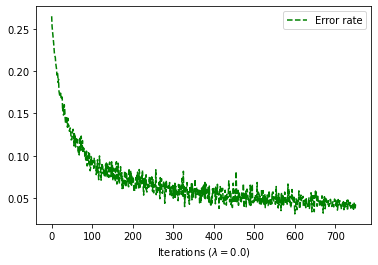

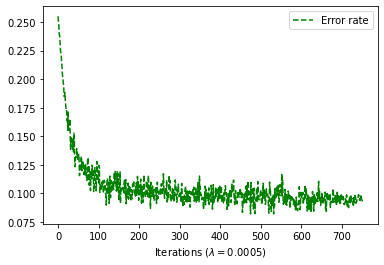

In [18]:

EPOCHS_in = 10 
BATCH_SIZE_in = 200
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

#without regularisation risque Overfitting

lambdavar=0.000 

model_no_reg = Logistic_Reg_model(input_size)


print('Run training - without reg') 

Lists_Results=W2Rcore.W2R_fit(model_no_reg,X_bw_train,Titles_train, Gen_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar)+'_noreg.pdf')

#with regularisation risque Underfitting

lambdavar_r=0.0005

model_reg = Logistic_Reg_model(input_size)

print('Run training - with reg')
Lists_Results=W2Rcore.W2R_fit(model_reg,X_bw_train,Titles_train, Gen_train, lambdavar_r, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar_r)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar_r)+'_reg.pdf')




**Tests - without regularisation**

In [27]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_no_reg,X_bw_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric

loss = error(predY_test, Titles_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)   
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])

mse = sum((y_pred_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse)

Accuracy=accuracy_score(y_true_np, y_pred_np)

y_pred_torch=torch.FloatTensor(y_pred_np)
y_pred_torch=y_pred_torch.reshape(y_pred_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_torch,y_true_torch,Gen_test,y_pred_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions')
W_score=result[1]

Loss (test data): tensor(0.0415)
DI: 0.193447774586812
s0_RatioGoodPred: 0.9397910731244065
s1_RatioGoodPred: 0.9641261498028909
MSE : 0.0458252427184466


**Tests - with regularisation**

In [29]:
predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_reg,X_bw_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, Titles_test.float())
    
tmp_loss=loss.data 
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI_r=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI_r) 
    
tmp_cm_r=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)  
print('s0_RatioGoodPred:',tmp_cm_r['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm_r['s1_RatioGoodPred'])

mse_r = sum((y_pred_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse_r)

Accuracy_r=accuracy_score(y_true_np, y_pred_np)
print("Accuracy", Accuracy_r)

y_pred_torch=torch.FloatTensor(y_pred_np)
y_pred_torch=y_pred_torch.reshape(y_pred_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result_r=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_torch,y_true_torch,Gen_test,y_pred_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions')
W_score_r=result_r[1]

Loss (test data): tensor(0.0963)
DI: 0.18470169961637928
s0_RatioGoodPred: 0.9466286799620133
s1_RatioGoodPred: 0.9479632063074901
MSE : 0.05258252427184466
Accuracy 0.9474174757281554


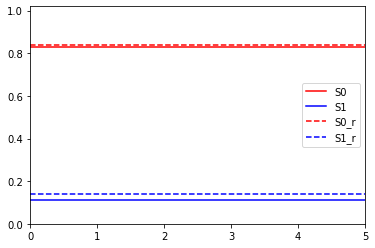

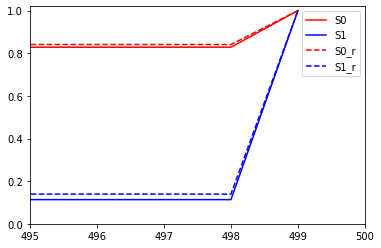

In [30]:
plt.figure()
plt.plot(result[2],'r',label="S0")
plt.plot(result[3],'b',label="S1")
plt.plot(result_r[2],'r--',label="S0_r")
plt.plot(result_r[3],'b--',label="S1_r")
plt.xlim(0, 5)
plt.ylim(0,1.02)
plt.legend()
plt.show()

plt.figure()
plt.plot(result[2],'r',label="S0")
plt.plot(result[3],'b',label="S1")
plt.plot(result_r[2],'r--',label="S0_r")
plt.plot(result_r[3],'b--',label="S1_r")
plt.xlim(495, 500)
plt.ylim(0,1.02)
plt.legend()
plt.show()

In [ ]:
#lambda_=[]
#lambda_r=[]
#DI=[]
#DI_r=[]
#MSE=[]
#MSE_r=[]
#s0RGP=[]
#s1RGP=[]
#s0RGP_r=[]
#s1RGP_r=[]
#accuracy=[]
#accuracy_r=[]
#W=[]
#W_r=[]

In [45]:
lambda_.append(lambdavar)
lambda_r.append(lambdavar_r)

DI.append(tmp_DI)
DI_r.append(tmp_DI_r)

MSE.append(mse)
MSE_r.append(mse_r)

s0RGP.append(tmp_cm['s0_RatioGoodPred'])
s1RGP.append(tmp_cm['s1_RatioGoodPred']) 

s0RGP_r.append(tmp_cm_r['s0_RatioGoodPred'])
s1RGP_r.append(tmp_cm_r['s1_RatioGoodPred'])

accuracy.append(Accuracy)
accuracy_r.append(Accuracy_r)

W.append(W_score)
W_r.append(W_score_r)

NameError: name 'lambda_' is not defined

## Visualization

In [ ]:
#Accuracy
plt.figure()
plt.scatter(lambda_, accuracy, color='blue')
plt.scatter(lambda_r, accuracy_r, color='blue')
plt.xlabel('lambda')
plt.ylabel('précision')
plt.title("Accuracy")
plt.savefig('Accuracy_reg.pdf')

#DI
plt.figure()
plt.scatter(lambda_, DI, color='blue')
plt.scatter(lambda_r, DI_r, color='blue')
plt.xlabel('lambda')
plt.title("DI")
plt.savefig('DI_reg.pdf')


#MSE
plt.figure()
plt.scatter(lambda_, MSE, color='blue')
plt.scatter(lambda_r, MSE_r, color='blue')
plt.xlabel('lambda')
plt.title("MSE")
plt.savefig('MSE_reg.pdf')

#Ratio good pred
plt.figure()
plt.scatter(lambda_, s1RGP, label="s1", color='red')
plt.scatter(lambda_, s0RGP, label="s0", color='blue')
plt.scatter(lambda_r, s0RGP_r, color='blue')
plt.scatter(lambda_r, s1RGP_r, color='red')
plt.xlabel('lambda')
plt.title("RatioGoodPred")
plt.legend()
plt.savefig('RatioGoodPred_reg.pdf')

#W score
plt.figure()
plt.scatter(lambda_, W, color='blue')
plt.scatter(lambda_r, W_r, color='blue')
plt.xlabel('lambda')
plt.title("W score")
plt.savefig('W_reg.pdf')
           

## Without gender information

In [ ]:
#parametres

input_size = len(X_bw_nogen_train[0])
#print(input_size) pourquoi 1006 et pas 1000
opti_lr = 1e-3 #le pas d'apprentissage

In [ ]:

EPOCHS_in = 5 
BATCH_SIZE_in = 200 
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  

#without regularisation risque Overfitting

model_no_reg_nogen = Logistic_Reg_model(input_size)


print('Run training - without reg') 

Lists_Results_nogen=W2Rcore.W2R_fit(model_no_reg_nogen,X_bw_nogen_train,Titles_train, Gen_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results_nogen['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar)+'_noreg.pdf')

#with regularisation risque Underfitting

model_reg_nogen = Logistic_Reg_model(input_size)

print('Run training - with reg')
Lists_Results_nogen=W2Rcore.W2R_fit(model_reg_nogen,X_bw_nogen_train,Titles_train, Gen_train, lambdavar_r, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results_nogen['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar_r)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar_r)+'_reg.pdf')


**Tests - with regularisation**

In [ ]:
predY_nogen_test=torch.clone(W2Rcore.LargeDatasetPred(model_no_reg_nogen,X_bw_nogen_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric

loss = error(predY_nogen_test, Titles_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_nogen_np=1*(predY_nogen_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_nogen_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_nogen_np, y_true_np, S_np)
print(tmp_cm)   
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])

mse = sum((y_pred_nogen_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse)

Accuracy=accuracy_score(y_true_np, y_pred_nogen_np)

y_pred_nogen_torch=torch.FloatTensor(y_pred_nogen_np)
y_pred_nogen_torch=y_pred_torch.reshape(y_pred_nogen_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_nogen_torch,y_true_torch,Gen_test,y_pred_nogen_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions',show_histos=True)
W_score=result[1]

**Tests - without regularisation**

In [ ]:
predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_reg_nogen,X_bw_nogen_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, Titles_test.float())
    
tmp_loss=loss.data #fonction coût, loss est un scalaire elle doit tendre vers 0
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI_r=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI_r) #DI = disparate_impact
    
tmp_cm_r=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
#print(tmp_cm)  
print('s0_RatioGoodPred:',tmp_cm_r['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm_r['s1_RatioGoodPred'])


mse_r = sum((y_pred_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse)

Accuracy_r=accuracy_score(y_true_np, y_pred_np)

y_pred_torch=torch.FloatTensor(y_pred_np)
y_pred_torch=y_pred_torch.reshape(y_pred_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_torch,y_true_torch,Gen_test,y_pred_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions')
W_score_r=result[1]

In [ ]:
#lambda_nogen=[]
#lambda_nogen_r=[]
#DI_nogen=[]
#DI_nogen_r=[]
#MSE_nogen=[]
#MSE_nogen_r=[]
#s0RGP_nogen=[]
#s1RGP_nogen=[]
#s0RGP_nogen_r=[]
#s1RGP_nogen_r=[]
#accuracy_nogen=[]
#accuracy_nogen_r=[]
#W_nogen=[]
#W_nogen_r=[]

In [ ]:
lambda_nogen.append(lambdavar)
lambda_nogen_r.append(lambdavar_r)

DI_nogen.append(tmp_DI)
DI_nogen_r.append(tmp_DI_r)

MSE_nogen.append(mse)
MSE_nogen_r.append(mse_r)

s0RGP_nogen.append(tmp_cm['s0_RatioGoodPred'])
s1RGP_nogen.append(tmp_cm['s1_RatioGoodPred']) 

s0RGP_nogen_r.append(tmp_cm_r['s0_RatioGoodPred'])
s1RGP_nogen_r.append(tmp_cm_r['s1_RatioGoodPred'])

W_nogen.append(W_score)
W_nogen_r.append(W_score_r)

accuracy_nogen.append(Accuracy)
accuracy_nogen_r.append(Accuracy_r)

## Visualization

In [ ]:
#Accuracy
plt.figure()
plt.scatter(lambda_nogen, accuracy, color='blue')
plt.scatter(lambda_nogen_r, accuracy_nogen_r, color='blue')
plt.xlabel('lambda')
plt.ylabel('précision')
plt.title("Accuracy nogen")
plt.savefig('Accuracy_nogen_reg.pdf')

#DI
plt.figure()
plt.scatter(lambda_nogen, DI_nogen, color='blue')
plt.scatter(lambda_nogen_r, DI_nogen_r, color='blue')
plt.xlabel('lambda')
plt.title("DI nogen")
plt.savefig('DI_nogen_reg.pdf')

#MSE
plt.figure()
plt.scatter(lambda_nogen, MSE_nogen, color='blue')
plt.scatter(lambda_nogen_r, MSE_nogen_r, color='blue')
plt.xlabel('lambda')
plt.title("MSE nogen")
plt.savefig('MSE_nogen_reg.pdf')

#Ratio good pred
plt.figure()
plt.scatter(lambda_nogen, s1RGP_nogen, label="s1", color='red')
plt.scatter(lambda_nogen, s0RGP_nogen, label="s0", color='blue')
plt.scatter(lambda_nogen_r, s0RGP_nogen_r, color='blue')
plt.scatter(lambda_nogen_r, s1RGP_nogen_r, color='red')
plt.xlabel('lambda')
plt.title("RatioGoodPred nogen")
plt.legend()
plt.savefig('RatioGoodPred_nogen_reg.pdf')

#W score
plt.figure()
plt.scatter(lambda_, W_nogen, color='blue')
plt.scatter(lambda_r, W_nogen_r, color='blue')
plt.xlabel('lambda')
plt.title("W score nogen")
plt.savefig('W_nogen_reg.pdf')